In [133]:
import numpy as np
import pandas as pd
import torch
import torchmetrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [134]:
# load predictions and test y tensor
preds = np.load('../models/model_preds.npy')
test_y = torch.load('../models/test_y.pt')

In [135]:
print(test_y)

tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])


In [136]:
print(preds)

[1 1 1 0 1 1 0 0 1 1 1]


In [137]:
# transform predicti    ons to tensor
preds_tensor = torch.from_numpy(preds)
preds_tensor

tensor([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [138]:
cfm = confusion_matrix(preds_tensor, test_y)
cfm

array([[1, 2],
       [4, 4]])

In [139]:
df_cfm = pd.DataFrame(
    cfm/np.sum(cfm), 
    index = ['Actually Negative', 'Actually Positive'], 
    columns = ['Predicted Negative', 'Predicted Positive']
)
tn, fp, fn, tp = cfm.ravel()

In [140]:
precision = tp/(tp+fp)
precision

0.6666666666666666

In [141]:
recall = tp/(tp+fn)
recall

0.5

In [142]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.5714285714285715

                   Predicted Negative  Predicted Positive
Actually Negative            0.090909            0.181818
Actually Positive            0.363636            0.363636


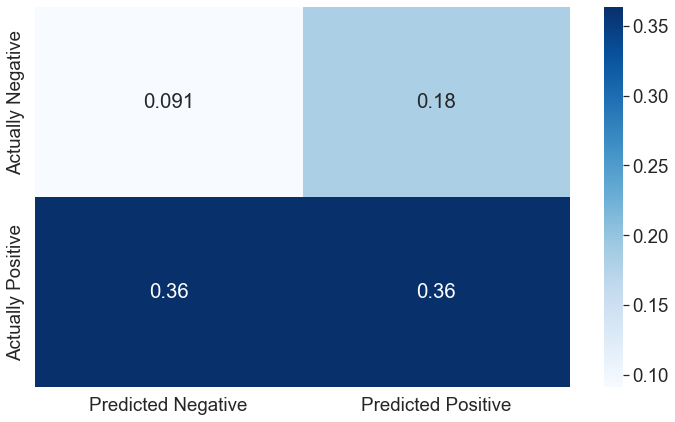

In [143]:
print(df_cfm)
plt.figure(figsize = (12,7))
sns.heatmap(df_cfm, annot=True, cmap="Blues")
sns.set(font_scale=1.7)
plt.savefig('../figures/cfm_matrix.png')